# Actividad Limpieza de datos
### Fernanda Ponce Maciel A01799293
### Sandra Paulina Herrera Rebolledo A01798452


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bike_buyers.csv')

In [5]:
print(df.head())
print(df.info())
print(df.describe())

      ID Marital Status  Gender  Income  Children            Education  \
0  12591        Married  Female  30,000       4.0      Graduate Degree   
1  14058         Single    Male  70,000       0.0            Bachelors   
2  23962        Married  Female  10,000       0.0  Partial High School   
3  23419         Single  Female  70,000       5.0            Bachelors   
4  21940        Married    Male  90,000       5.0      Graduate Degree   

     Occupation Home Owner  Cars Commute Distance         Region   Age  \
0      Clerical        Yes   0.0        0-1 Miles         Europe  45.0   
1  Professional         No   1.0       5-10 Miles        Pacific  41.0   
2        Manual        Yes   2.0        1-2 Miles         Europe  32.0   
3  Professional        Yes   3.0        10+ Miles        Pacific  39.0   
4  Professional        Yes   0.0        0-1 Miles  North America  47.0   

  Purchased Bike  
0             No  
1            Yes  
2             No  
3             No  
4            Ye

In [6]:
# Verificar si hay datos faltantes
print(df.isnull().sum())

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64


In [8]:
df.fillna({
    'Marital Status': df['Marital Status'].mode()[0],
    'Gender': df['Gender'].mode()[0],
    'Home Owner': df['Home Owner'].mode()[0]
}, inplace=True)

In [10]:
df['Income'] = df['Income'].replace(',', '', regex=True).astype(float)

In [12]:
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [13]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [14]:
df['Marital Status'] = df['Marital Status'].fillna(df['Marital Status'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Home Owner'] = df['Home Owner'].fillna(df['Home Owner'].mode()[0])

In [15]:
df['Children'] = df['Children'].fillna(0)
df['Cars'] = df['Cars'].fillna(0)

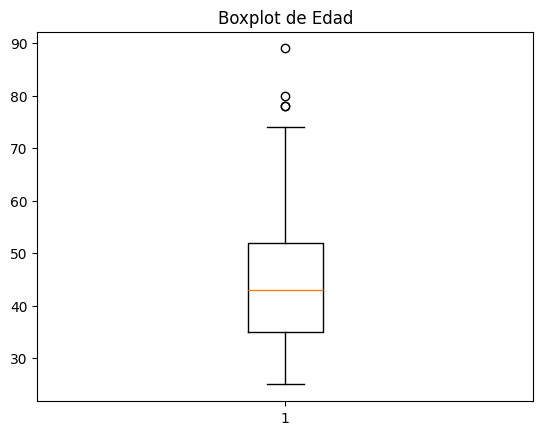

In [16]:
plt.boxplot(df['Age'])
plt.title('Boxplot de Edad')
plt.show()

In [17]:
df = df[df['Age'] <= 80]

In [18]:
df['Home Owner'] = df['Home Owner'].map({'Yes': 1, 'No': 0})
df['Purchased Bike'] = df['Purchased Bike'].map({'Yes': 1, 'No': 0})

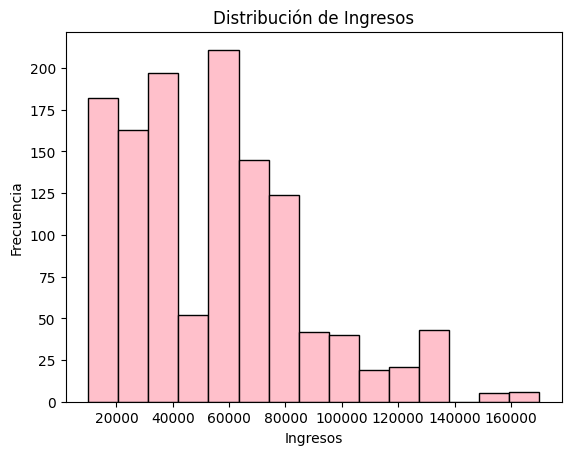

In [24]:
# Histograma de Ingresos
plt.hist(df['Income'], bins=15, color='pink', edgecolor='black')
plt.title('Distribución de Ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.show()

In [19]:
print("\nVerificación final de valores faltantes:")
print(df.isnull().sum())


Verificación final de valores faltantes:
ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64


In [20]:
df.to_csv('bike_buyers_clean.csv', index=False)

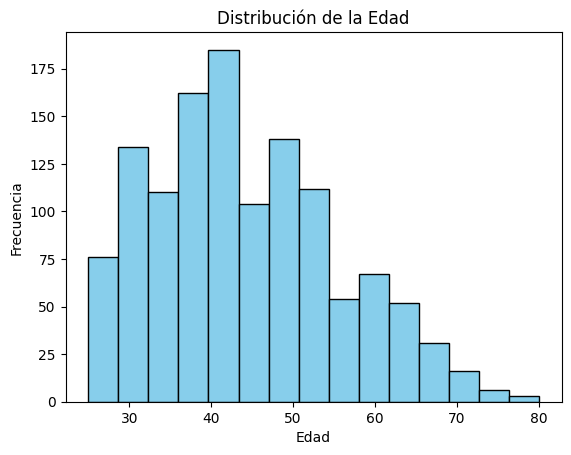

In [22]:
# Histograma de Edad
plt.hist(df['Age'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

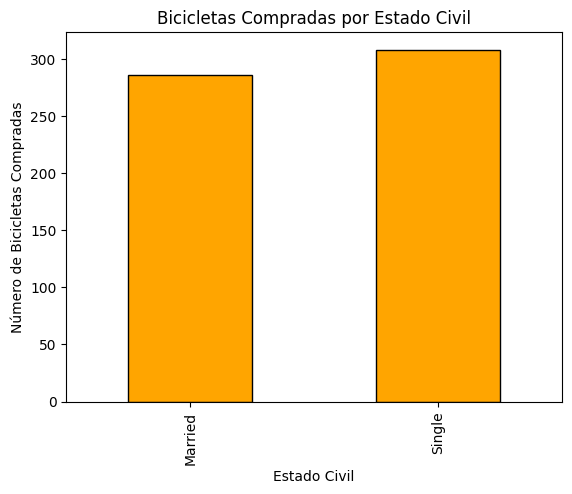

In [25]:
# Gráfico de barras para Purchased Bike por Estado Civil
df.groupby('Marital Status')['Purchased Bike'].sum().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Bicicletas Compradas por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Bicicletas Compradas')
plt.show()

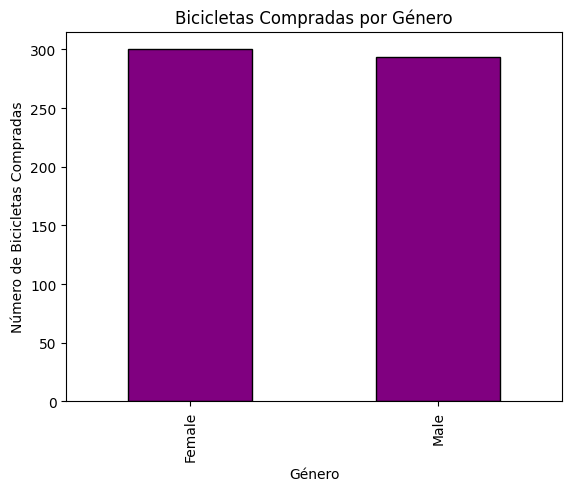

In [26]:
# Gráfico de barras para Género y Bicicletas Compradas
df.groupby('Gender')['Purchased Bike'].sum().plot(kind='bar', color='purple', edgecolor='black')
plt.title('Bicicletas Compradas por Género')
plt.xlabel('Género')
plt.ylabel('Número de Bicicletas Compradas')
plt.show()

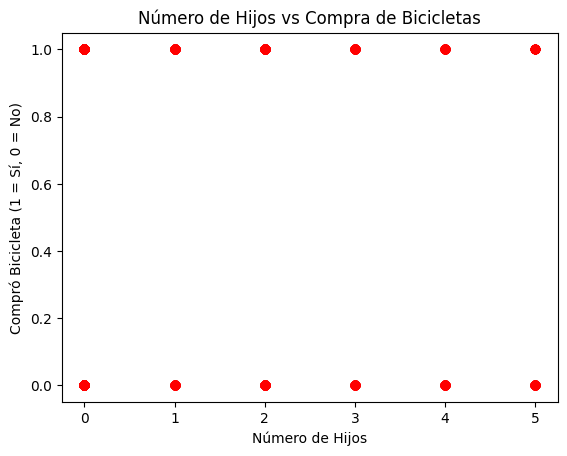

In [27]:
# Gráfico de dispersión entre Children y Purchased Bike
plt.scatter(df['Children'], df['Purchased Bike'], color='red')
plt.title('Número de Hijos vs Compra de Bicicletas')
plt.xlabel('Número de Hijos')
plt.ylabel('Compró Bicicleta (1 = Sí, 0 = No)')
plt.show()

In [21]:
print("\nLimpieza de datos completada y archivo guardado como 'bike_buyers_clean.csv'")


Limpieza de datos completada y archivo guardado como 'bike_buyers_clean.csv'
